<a href="https://colab.research.google.com/github/michaelsong4399/asteroseismology/blob/rohit/RNN_Test_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Cycles

In [1]:
!pip install lightkurve

     |████████████████████████████████| 235kB 6.7MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 3.4MB 40.2MB/s 
     |████████████████████████████████| 6.5MB 45.4MB/s 
     |████████████████████████████████| 22.2MB 71.6MB/s 
     |████████████████████████████████| 256kB 49.5MB/s 
     |████████████████████████████████| 788kB 49.0MB/s 
     |████████████████████████████████| 25.3MB 65.6MB/s 
     |████████████████████████████████| 368kB 44.6MB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 3.2MB 48.3MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=a0e5cc06b398d3af440585520130c473acd1f11a0dedf08dc11f7afe07798844
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
  Created wheel for fbpca: filename=fbpca-1.0-cp36-none-any.whl size=11377 sha256=d521cf71dd61931e7b86b26178a86f3593926

In [74]:
import lightkurve as lk
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
import scipy
import pandas as pd 
from scipy import interpolate

In [3]:
#tf
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [4]:
#Cycles
    #21
        #cycle_21 = []
        
        #Start 1 March 1976
        #End 1 September 1986
        
    #22 - partially incomplete 
        #cycle_22 = [2446674.5,2450296.5]
        
        #Start: 1 September 1986 2446674.5
        #End: 1 August 1996 2450296.5
        
    #23
cycle_23 = [2450296.5,2454801.5]
        
        #Start: 1 August 1996 2450296.5
        #End: 1 December 2008 2454801.5
        
    #24
cycle_24 = [2454801.5,2458940.5]
        
        #Start: 1 December 2008 2454801.5
        #End: 1 May 2020 2458970.5
        #NOTE: Due to dataset limitation, only analyzed up to 2458940.5
  

# Google Drive  Login


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# BiSON Data

In [6]:
data_sv = '/content/drive/My Drive/Korea Research - Yihong Song and Rohit Prasanna/DSHS & AOS Physics Research Collaboration 2020/Project/Jr:Sr Project/Data/allsites-alldata-waverage-fill.fits'
hdul = fits.open(data_sv)

hdul.info()

tsdata = hdul[0].data
#         SIMPLE  =                    T / Written by IDL:  Tue Jan 19 11:22:20 2016      
#         BITPIX  =                  -64 /Real*8 (double precision)                       
#         NAXIS   =                    2 /                                                
#         NAXIS1  =                    2 /                                                
#         NAXIS2  =             24455519 /                                                
DSTART =        2442778.50000 #Data start (Julian)      1/1/1976 0:00:00                        
DEND   =        2458940.50000 #Data end (Julian)        4/1/2020 0:00:00                       
#         STATIONS= 'na ca cb su iz la lb mo' /Stations Used                              
#         METHOD  = 'waverage'           /Overlap Method                                  
#         CADENCE = '40      '           /Timeseries Cadence                              
#         N-THRES =                   80 /Noise Rejection Threshold                       
#         GAPFILL =                    1 /GapFill                                         
#         FILL    =             0.638866 /Duty Cycle   
#
#         ~2160 datapoints per day

Filename: /content/drive/My Drive/Korea Research - Yihong Song and Rohit Prasanna/DSHS & AOS Physics Research Collaboration 2020/Project/Jr:Sr Project/Data/allsites-alldata-waverage-fill.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   (2, 34909918)   float64   


In [7]:
def getSV(cycle):
    #Subtract starting date
  cycle = np.subtract(cycle,DSTART)
    
    #multiply by 2160 (2160 datapoints per day)
  cycle = np.multiply(cycle,2160)
    
  return tsdata[int(cycle[0]):int(cycle[1])].T[1]
print(getSV(cycle_23))

[ 0.52007627  0.87248993  0.11934945 ...  0.25079036 -1.0275805
 -0.95429337]


In [8]:
def getSV_index(cycle):
  cycle = np.subtract(cycle, DSTART)
  cycle = np.multiply(cycle, 2160)
  return tsdata[int(cycle[0]):int(cycle[1])].T[0]
print(getSV_index(cycle_23))

[2450296.50033958 2450296.50080254 2450296.50126551 ... 2454801.49915418
 2454801.49961714 2454801.50008011]


In [9]:
# plt.xlabel('Time (BJD)')
# plt.ylabel('Surface Velocity (m/s)')
# plt.title('Surface Velocity vs Time for Cycle 23')

# plt.autoscale(enable=True, axis='both', tight=None)
# plt.scatter(getSV_index(cycle_23), getSV(cycle_23), s = 5, c = 'red', alpha = 0.5)
# plt.show()

In [10]:
# plt.xlabel('Time (BJD)')
# plt.ylabel('Surface Velocity (m/s)')
# plt.title('Surface Velocity vs Time for Cycle 24')

# plt.autoscale(enable=True, axis='both', tight=None)
# plt.scatter(getSV_index(cycle_24), getSV(cycle_24), s = 5, c = 'red', alpha = 0.5)
# plt.show()

# Solar Proxies (Sun Spot)

In [11]:
#sunspot_Day = np.genfromtxt('data/SN_d_tot_V2.0.csv',delimiter=';')
sunspot_Day = np.genfromtxt('/content/drive/MyDrive/Korea Research - Yihong Song and Rohit Prasanna/DSHS & AOS Physics Research Collaboration 2020/Project/Jr:Sr Project/Data/SN_d_tot_V2.0.csv',delimiter=';')
SNSTART_Day = 2385070.5
SNEND_day = 2459000.5

#sunspot_Month = np.genfromtxt('data/SN_ms_tot_V2.0.csv',delimiter=';')
sunspot_Month = np.genfromtxt('/content/drive/MyDrive/Korea Research - Yihong Song and Rohit Prasanna/DSHS & AOS Physics Research Collaboration 2020/Project/Jr:Sr Project/Data/SN_ms_tot_V2.0.csv',delimiter=';')
sunspot_Month = sunspot_Month[828:]

In [12]:
def getSN_Day(cycle):
  if cycle[1] >= SNEND_day:
      cycle[1] = SNEND_day
  cycle = np.subtract(cycle, SNSTART_Day)
  sn = sunspot_Day.T[4][int(cycle[0]):int(cycle[1])]
  
  npout = [[0,0]]
  for i in range(len(sn)):
      npout = np.append(npout,[[i+SNSTART_Day+cycle[0],sn[i]]],0)
  npout = npout[1:]
  return npout

In [13]:
def getSNAverage(cycle,length):
  npout = [[0,0]]
  total = 0
  valid_count = 0
  start = cycle[0][0]
  for i in range(len(cycle)):
      if cycle[i][1] >= 0:
          total += cycle[i][1]
          valid_count += 1
      if (i+1) % length < 1 or i == len(cycle)-1:
          if valid_count == 0:
            npout = np.append(npout,[[start,np.average(cycle)]],0)
          else:
            npout = np.append(npout,[[start,total/valid_count]],0)
          total = 0
          valid_count = 0
          if i == len(cycle)-1:
              break
          start = cycle[i+1][0]
  npout = npout[1:]
  return npout

# Preprocessing


In [14]:
def getPeriodogram(time,freq):
    lc = lk.LightCurve(time=time.tolist(),flux=freq.tolist())
    lc = lc.remove_nans()
    pg = lc.to_periodogram(method='lombscargle', normalization='psd',minimum_frequency=1000, maximum_frequency=5000)
    #ax = pg.plot()
    pg_data = pg.to_table()
    data = np.array(pg_data['power']).T#.tolist()


    # pg.smooth(method='boxkernel', filter_width=1.)#.plot(ax=ax, label='Smoothed', c='red', lw=2)
    # #ax.axvline(pg.frequency_at_max_power.value, lw=2, ls='dashed')
    # snr = pg.flatten()
    # seis = snr.to_seismology()
    # numax = seis.estimate_numax()
    # numax = float(str(numax)[0:7])
    return data

In [15]:
def tsNumax(time,freq,length,interval):
  length = int(length * 2160)
  interval = int(interval * 2160)
  #npout = [[0,0]]
  check = True
  for start in range(0,len(time),interval):
      if start + length >= len(time):
          length = len(time) - start
      if check:
        check = False
        npout1d = np.array([getPeriodogram(time[start:start+length],freq[start:start+length])])
      else:
        temp = np.array([getPeriodogram(time[start:start+length],freq[start:start+length])])
        if temp.size == npout1d[-1].size:
          npout1d = np.append(npout1d,temp,0)
  return npout1d

In [16]:
numax_cycle_23_37 = tsNumax(getSV_index(cycle_23), getSV(cycle_23), 182.5, 37)

In [17]:
numax_cycle_24_37 = tsNumax(getSV_index(cycle_24), getSV(cycle_24), 182.5, 37)

# RNN Model

In [31]:
def normalize_SN_y(cycle):
  data_SN = getSNAverage(np.ma.masked_equal(getSN_Day(cycle), 0), 37)
  y_pre = (data_SN.T[1])[:-5]
  SN_max = float(np.max(y_pre))
  train_y = np.divide(y_pre, SN_max)
  return train_y

In [48]:
train_x = numax_cycle_23_37
train_x = train_x.reshape(train_x.shape[0], 1, train_x.shape[1])
train_y = normalize_SN_y(cycle_23)

test_train_x = numax_cycle_24_37
test_train_x = test_train_x.reshape(test_train_x.shape[0], 1, test_train_x.shape[1])
test_train_y = normalize_SN_y(cycle_24)

In [93]:
tf.test.gpu_device_name()
keras.backend.clear_session()

model = models.Sequential()

model.add(layers.LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(100))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(50, activation='relu'))

model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 100)            25269200  
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5

In [94]:
# print('Train X Size: ', train_x.shape)
# print('Train Y Size: ', train_y.shape)

# print('Test X Size: ', test_train_x.shape)
# print('Test Y Size: ', test_train_y.shape)

history = model.fit(train_x, train_y, epochs=100, validation_data=(test_train_x, test_train_y))


Epoch 1/100
4/4 [==============================] - 5s 461ms/step - loss: 0.2018 - acc: 0.0000e+00 - val_loss: 0.1865 - val_acc: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 1s 214ms/step - loss: 0.2132 - acc: 0.0000e+00 - val_loss: 0.1578 - val_acc: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 1s 216ms/step - loss: 0.1636 - acc: 0.0000e+00 - val_loss: 0.1214 - val_acc: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 1s 213ms/step - loss: 0.1298 - acc: 0.0000e+00 - val_loss: 0.0841 - val_acc: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 1s 215ms/step - loss: 0.0802 - acc: 0.0000e+00 - val_loss: 0.0692 - val_acc: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 1s 215ms/step - loss: 0.0820 - acc: 0.0000e+00 - val_loss: 0.0762 - val_acc: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 1s 212ms/step - loss: 0.0865 - acc: 0.0000e+00 - val_loss: 0.0702 - val_acc: 0.0000e+00
Epoch 8/100
4/4 [==========

In [95]:
pred_y = model.predict(train_x)

In [96]:
pred_y = pred_y.reshape(-1)
print(pred_y)

[0.09309365 0.09202635 0.10000531 0.10725503 0.10269272 0.10133392
 0.10333744 0.10340171 0.10494903 0.1099867  0.2333194  0.19561175
 0.20136008 0.23082092 0.20421919 0.28089836 0.37658226 0.28118673
 0.4032017  0.4186145  0.5562627  0.46351704 0.38973036 0.51066285
 0.33854207 0.56028694 0.38582632 0.6540461  0.9100284  0.69786555
 0.57164043 0.6313336  0.7867469  0.5036293  0.6803213  0.8721493
 0.90636003 0.72018695 0.9458708  1.0013671  0.64228225 0.6582728
 0.65513486 0.69010013 0.56351566 0.6212404  0.73960876 0.649162
 0.7318391  0.64007074 0.96484417 0.85069305 0.8348071  0.87418264
 0.78180367 0.6889617  0.8560874  0.7227537  0.51355267 0.83558506
 0.7701641  0.729618   0.6185525  0.5594081  0.37689686 0.45681667
 0.41488695 0.43639922 0.57358515 0.47600004 0.35317233 0.37793347
 0.42964858 0.2781891  0.3110714  0.32369602 0.29238006 0.32445252
 0.34260458 0.28080863 0.20593733 0.4154529  0.17068028 0.18939209
 0.18922529 0.19861725 0.23479116 0.27486283 0.3191085  0.22248036

(117,) (117,) (117,)


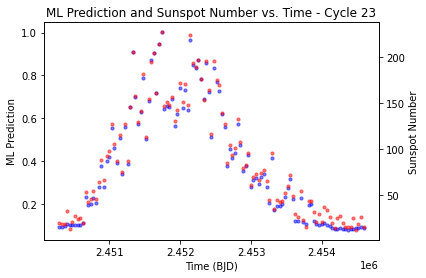

In [97]:
data_SN_23 = getSNAverage(np.ma.masked_equal(getSN_Day(cycle_23),0),37)[:-5]
datax_SN_23 = data_SN_23.T[0]
datay_SN_23 = data_SN_23.T[1]
print(datax_SN_23.shape, datay_SN_23.shape, pred_y.shape)

figure, axis_1 = plt.subplots()
plt.xlabel('Time (BJD)')
plt.title('ML Prediction and Sunspot Number vs. Time - Cycle 23')

axis_1.autoscale(enable=True, axis='both', tight=None)
axis_1.set_ylabel('ML Prediction')
axis_1.scatter(datax_SN_23,pred_y, s = 10, c='blue', alpha=0.5)

axis_2 = axis_1.twinx()
axis_2.set_ylabel('Sunspot Number')
axis_2.scatter(datax_SN_23,datay_SN_23, s = 10, c='red', alpha=0.5)

# lines_1, labels_1 = axis_1.get_legend_handles_labels() ------- add legend later
# lines_2, labels_2 = axis_2.get_legend_handles_labels()
# lines = lines_1 + lines_2
# labels = labels_1 + labels_2
# axis_1.legend(lines, labels, loc=0)

plt.show()

In [98]:
test_x = numax_cycle_24_37
test_x = test_x.reshape(test_x.shape[0], 1, test_x.shape[1])
print(test_x.shape)
test_y = model.predict(test_x)
test_y = test_y.reshape(-1)
print(test_y)

(107, 1, 63072)
[0.22875023 0.24513987 0.23573521 0.19164512 0.21094865 0.18284687
 0.19539934 0.21811697 0.2216883  0.26821142 0.21958485 0.24264139
 0.25398496 0.27536678 0.26600674 0.23046735 0.2549472  0.23979795
 0.25593606 0.27448067 0.28790227 0.28838545 0.2830752  0.2931903
 0.30087492 0.32458073 0.32692444 0.3870864  0.42644665 0.3879122
 0.36538678 0.37777072 0.3685202  0.3740969  0.30926454 0.31595007
 0.3214278  0.31865814 0.34088734 0.36118335 0.36978155 0.3666352
 0.3481464  0.31272072 0.33146176 0.3350924  0.3442793  0.41009772
 0.42495906 0.43009102 0.43399072 0.4651489  0.4360811  0.41608733
 0.41825998 0.42346394 0.47119206 0.45522517 0.4645173  0.43025923
 0.4090481  0.42953372 0.41633528 0.40018696 0.3504445  0.36596105
 0.37789798 0.37584484 0.3680864  0.3941402  0.3507641  0.34279406
 0.39492568 0.35688487 0.31651714 0.2978629  0.28878552 0.27392933
 0.24274892 0.2764868  0.31511033 0.37133265 0.38490292 0.39146453
 0.39616892 0.38013926 0.33599776 0.30005074 0.24

(107,) (107,) (107,)


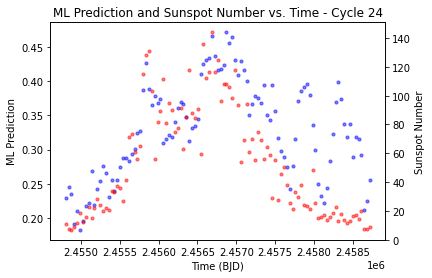

In [99]:
data_SN_24 = getSNAverage(np.ma.masked_equal(getSN_Day(cycle_24),0),37)[:-5]
datax_SN_24 = data_SN_24.T[0]
datay_SN_24 = data_SN_24.T[1]
print(datax_SN_24.shape, datay_SN_24.shape, test_y.shape)

figure, axis_1 = plt.subplots()
plt.xlabel('Time (BJD)')
plt.title('ML Prediction and Sunspot Number vs. Time - Cycle 24')

#Axis 1
axis_1.autoscale(enable=True, axis='both', tight=None)
axis_1.set_ylabel('ML Prediction')
axis_1.scatter(datax_SN_24,test_y, s = 10, c='blue', alpha=0.5)

#Axis 2
axis_2 = axis_1.twinx()
axis_2.set_ylabel('Sunspot Number')
axis_2.scatter(datax_SN_24,datay_SN_24, s = 10, c='red', alpha=0.5)

plt.show()

In [100]:
scale_23 = np.max(datay_SN_23)
valid_datay_SN_23 = np.divide(datay_SN_23, scale_23)

scale_24 = np.max(datay_SN_24)
valid_datay_SN_24 = np.divide(datay_SN_24, scale_24)

mse_23 = np.sqrt(mean_squared_error(valid_datay_SN_23,pred_y))
mae_23 = mean_absolute_error(valid_datay_SN_23,pred_y)
print("Cycle 23: Mean Sq. Err, Mean Abs. Err.")
print(round(mse_23,4),round(mae_23,4),round(min(mse_23,mae_23)*scale_23,4))
print()
mse_24 = np.sqrt(mean_squared_error(valid_datay_SN_24,test_y))
mae_24 = mean_absolute_error(valid_datay_SN_24,test_y)
print("Cycle 24: Mean Sq. Err, Mean Abs. Err.")
print(round(mse_24,4),round(mae_24,4),round(min(mse_24,mae_24)*scale_24,4))

Cycle 23: Mean Sq. Err, Mean Abs. Err.
0.0148 0.0109 2.4645

Cycle 24: Mean Sq. Err, Mean Abs. Err.
0.2237 0.1832 26.3823
